In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


#Importing Dataset

In [3]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

- Dataset has 614 rows and 13 columns

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Checking Null Values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
list1=["LoanAmount","Loan_Amount_Term"]
for i in list1:
  df[i]=df[i].fillna(df[i].mean())

list2=["Gender","Married","Dependents","Self_Employed","Credit_History"]
for i in list2:
  df[i]=df[i].fillna(df[i].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Visualization

In [ ]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


Male      502
Female    112
Name: Gender, dtype: int64


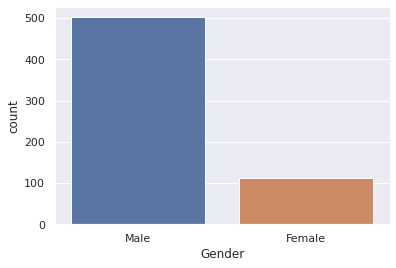

In [ ]:
sns.countplot(df["Gender"])
print(df['Gender'].value_counts())

- There are 502 male applicants and 112 female applicants for loan.

Yes    401
No     213
Name: Married, dtype: int64


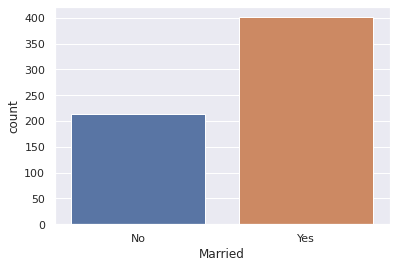

In [ ]:
sns.countplot(df["Married"])
print(df['Married'].value_counts())

- There are 401 married and 213 unmarried applicants for loan

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


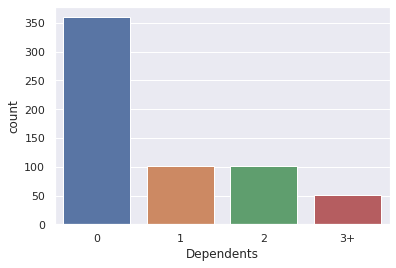

In [ ]:
sns.countplot(df["Dependents"])
print(df['Dependents'].value_counts())

- There are 360 applicants with 0 dependents
- 102 applicants with 1 dependent
- 101 applicants with 2 dependents
- 51 applicants with 3+ dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


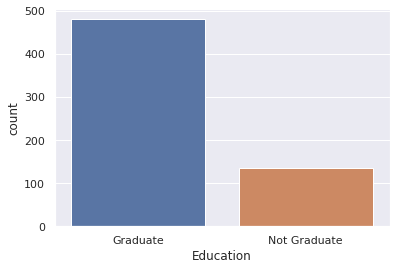

In [ ]:
sns.countplot(df["Education"])
print(df['Education'].value_counts())

- There are 480 graduates and 134 non graduates applicants for loan

No     532
Yes     82
Name: Self_Employed, dtype: int64


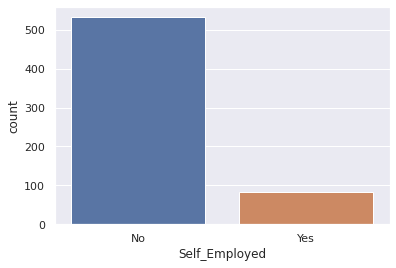

In [ ]:
sns.countplot(df["Self_Employed"])
print(df['Self_Employed'].value_counts())

- There are 82 self employed and 532 not self employed applicants

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


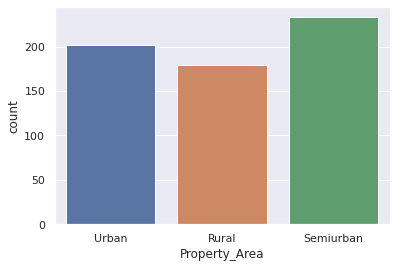

In [ ]:
sns.countplot(df["Property_Area"])
print(df['Property_Area'].value_counts())

Property area for which Applicants are applying for loan.
- Semiurban   - 233 applicants
- Urban       - 202 applicants
- Rural       - 179 applicants

Y    422
N    192
Name: Loan_Status, dtype: int64


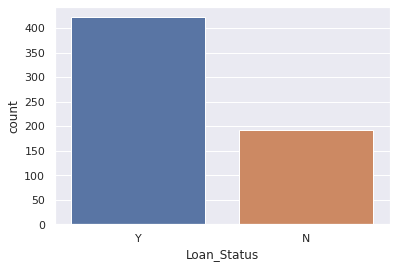

In [ ]:
sns.countplot(df["Loan_Status"])
print(df['Loan_Status'].value_counts())

- 422 applicants loan was approved whereas 192 applicants loan request was rejected.

Text(0, 0.5, 'Loan_Status')

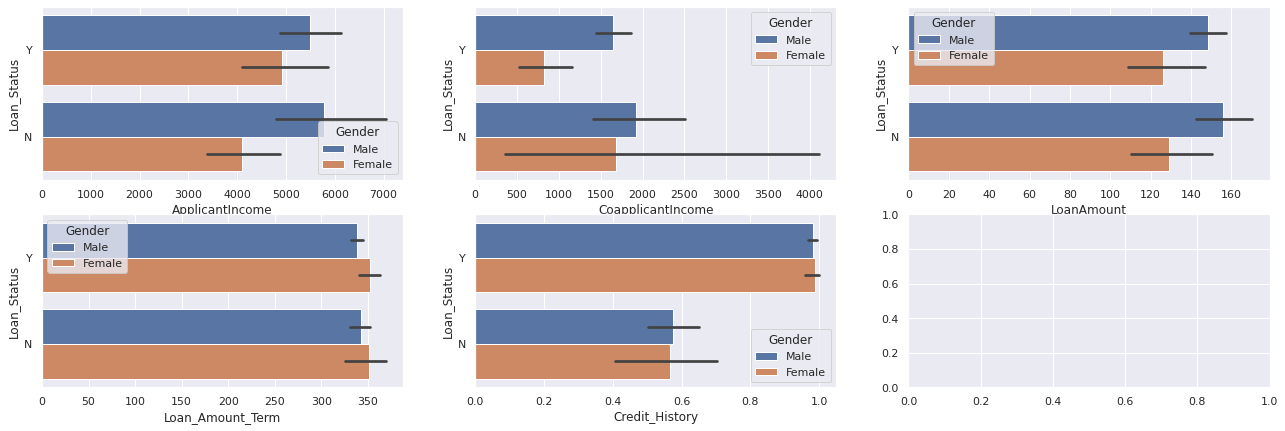

In [ ]:
sns.set()
fig,axes=plt.subplots(2,3,figsize=(22,7))
sns.barplot(x='ApplicantIncome',y="Loan_Status",hue="Gender",data=df,ax=axes[0,0])
axes[0,0].set_ylabel("Loan_Status")
sns.barplot(x='CoapplicantIncome',y="Loan_Status",hue="Gender",data=df,ax=axes[0,1])
axes[0,1].set_ylabel("Loan_Status")
sns.barplot(x='LoanAmount',y="Loan_Status",hue="Gender",data=df,ax=axes[0,2])
axes[0,2].set_ylabel("Loan_Status")
sns.barplot(x='Loan_Amount_Term',y="Loan_Status",hue="Gender",data=df,ax=axes[1,0])
axes[1,0].set_ylabel("Loan_Status")
sns.barplot(x='Credit_History',y="Loan_Status",hue="Gender",data=df,ax=axes[1,1])
axes[1,1].set_ylabel("Loan_Status")


Applicant Income
- Loan Accepted and Loan Rejected applicants both had male applicants with higher percentage of income than female.

Coapplicant Income
- Loan Accepted and Loan Rejected applicants both had male coapplicant with higher percentage of income than female coapplicant.

Loan Amount
- Loan Accepted and Loan Rejected applicants both had male applicants with request for larger loanamount than female applicants.

Loan Amount Term
- Loan Accepted and Loan Rejected applicants both had female applicants with longer loan term than male applicants.

Credit History
- Among Loan Accepted applicants female applicants had better credit history than male applicants 
- Among Loan Rejected applicants Male applicants had better credit history than Female applicants .

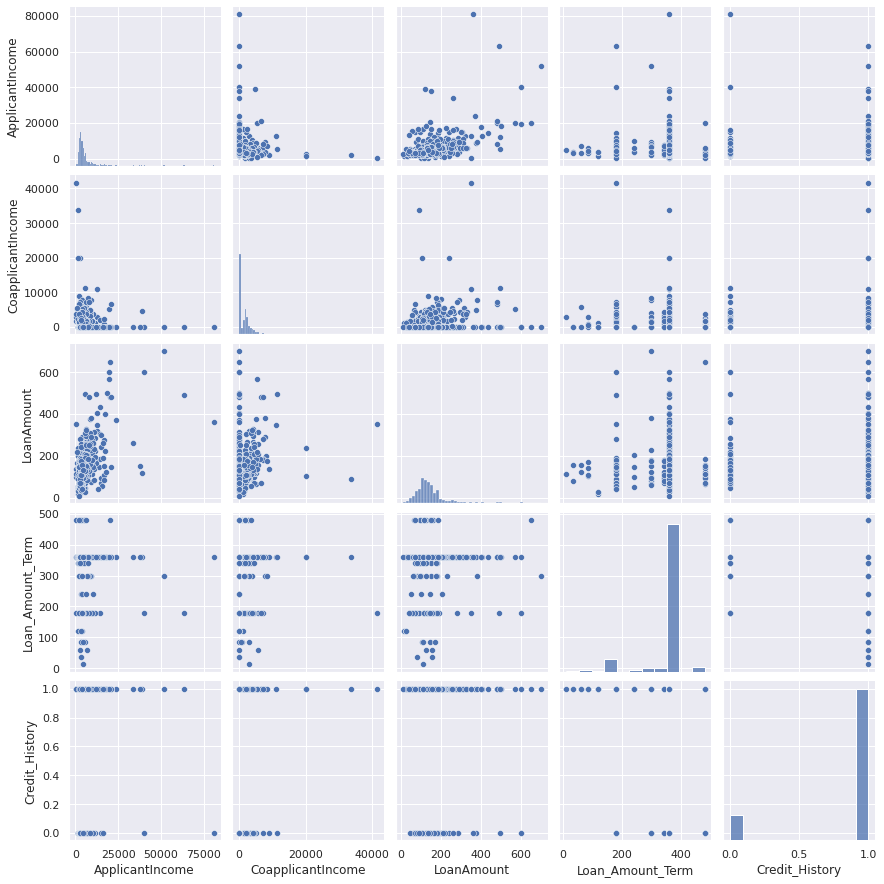

In [ ]:
sns.pairplot(df)

#Encoding categorical features

In [11]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
list3=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

for i in list3:
  df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
  
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Checking Correlation

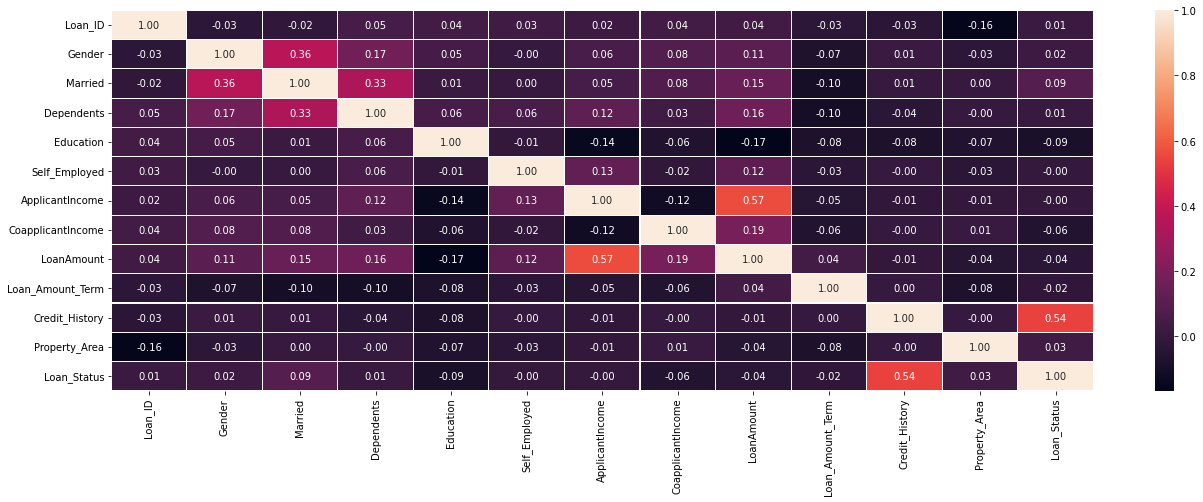

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

- Loan_ID has 1 percent correlation with target column which is considered as a very weak +ve bond.
- Gender has 2 percent correlation with target column which is considered as a very weak +ve bond.
- Married has 9 percent correlation with target column which is considered as a very weak +ve bond.
- Dependents has 1 percent correlation with target column which is considered as a very weak +ve bond.
- Eductaion has -9 percent correlation with target column which is considered as a strong -ve bond.
- CoapplicantIncome has -6 percent correlation with target column which is considered as a strong -ve bond.
- LoanAmount has -4 percent correlation with target column which is considered as a weak -ve bond.
- Loan_Amount_Term has -2 percent correlation with target column which is considered as a weak -ve bond.
- Credit_History has 54 percent correlation with target column which is considered as a strong +ve bond.
- Property_Area has 3 percent correlation with target column which is considered as a weak +ve bond.

# Describing Data

In [ ]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in PassengerId, Fare and Age compared to other features.

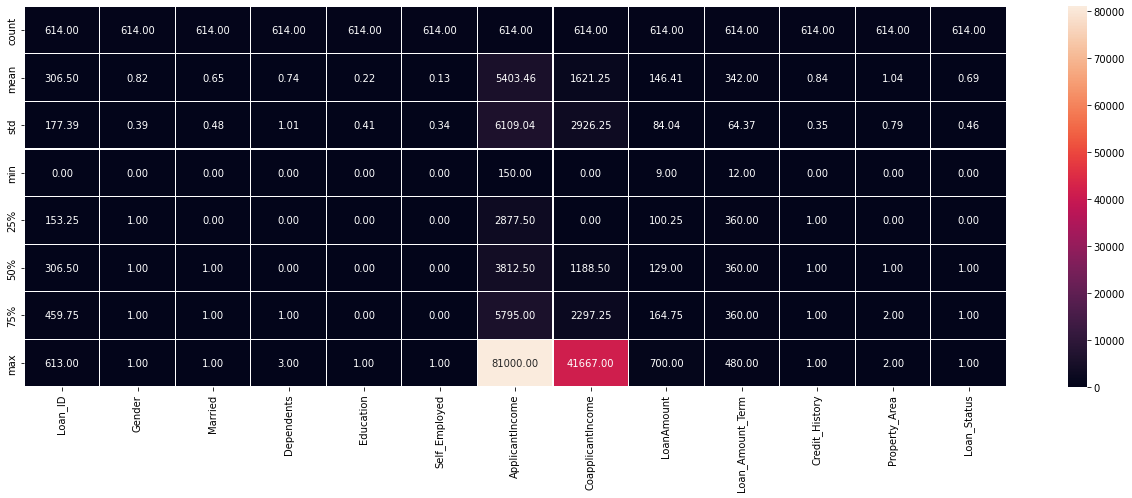

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

Loan_ID
- mean -	306.500000
- std -	177.390811
- min -	0.000000
- max -	613.000000

Gender
- mean -	0.817590
- std -	0.386497
- min -	0.000000
- max -	1.000000

Married	
- mean - 0.653094	
- std -	0.476373
- min -	0.000000	
- max -	1.000000

Dependents
- mean -	0.744300
- std -	1.009623
- min -	0.000000	
- max -3.000000	

Education
- mean -	0.218241
- std -	0.413389
- min -	0.000000
- max -	1.000000

Self_Employed
- mean -	0.133550	
- std -	0.340446	
- min -		0.000000
- max -		1.000000	

ApplicantIncome
- mean -	5403.459283	
- std -	6109.041673	
- min -	150.000000	
- max -	81000.000000	

CoapplicantIncome
- mean -	1621.245798	
- std -	2926.248369	
- min -	0.000000
- max -	41667.000000

LoanAmount 	
- mean -	146.412162
- std -	84.037468	
- min -	9.000000
- max -	700.000000

Loan_Amount_Term		
- mean -	342.000000	
- std -	64.372489	
- min -		12.000000	
- max -	480.000000	

Credit_History 
- mean - 0.842199	
- std -	0.349681	
- min -	0.000000	
- max -	1.000000	

Property_Area 
- mean - 1.037459
- std -	0.787482
- min -	0.000000
- max -	2.000000

Loan_Status
- mean - 0.687296
- std -	0.463973
- min -	0.000000
- max -	1.000000

# Separating input feature and target

In [12]:
x=df.drop(["Loan_Status"],axis=1)
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [13]:
y=df["Loan_Status"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

#Detecting Outliers

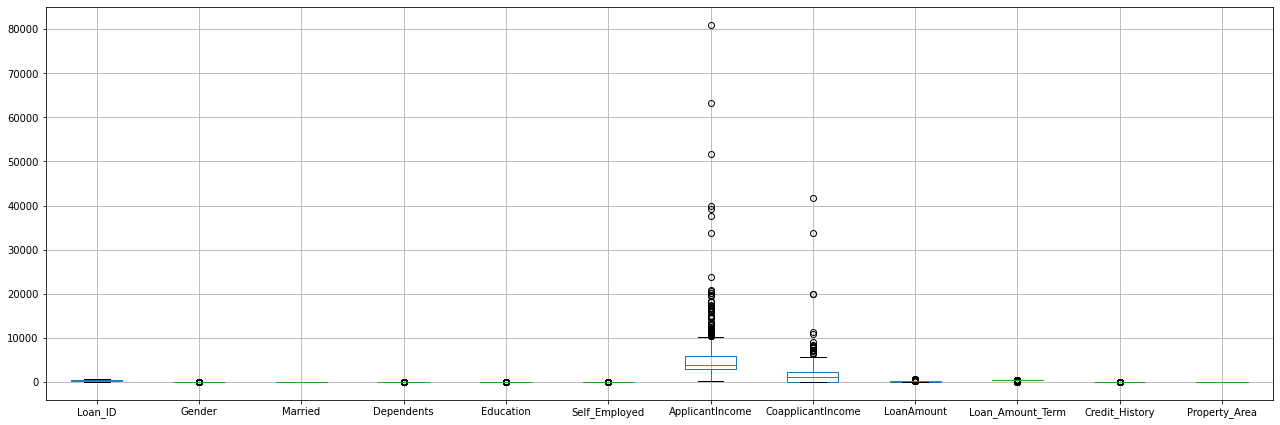

In [14]:
x.iloc[:,:13].boxplot(figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

In [15]:
x["Credit_History"].unique()

array([1., 0.])

Only following features contains outliers
- Gender
- Dependents
- Education
- Self_employed
- ApplicantIncome     
- CoapplicantIncome   
- LoanAmount       
- Loan_Amount_Term    
- Credit_History 

Only ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term are non categorical features from which outliers can be removed.  

In [16]:
df=x.copy()

In [17]:
new_df_cap=df.copy()

In [18]:
def remove_outliers(n):
  Q3=np.percentile(df[n],75,interpolation="midpoint")
  Q1=np.percentile(df[n],25,interpolation="midpoint")
  iqr=Q3-Q1
  percent75=df[n].quantile(0.75)
  percent25=df[n].quantile(0.25)
  upper_limit=percent75+1.5*iqr
  lower_limit=percent25-1.5*iqr
  df[df[n]>upper_limit]
  df[df[n]<lower_limit]

  new_df=df[df[n]<upper_limit]

  new_df_cap[n]=np.where(
      new_df_cap[n]>upper_limit,
      upper_limit,
      np.where(
          new_df_cap[n]<lower_limit,
          lower_limit,
          new_df_cap[n]
      )
  )
  sns.boxplot(new_df_cap[n])

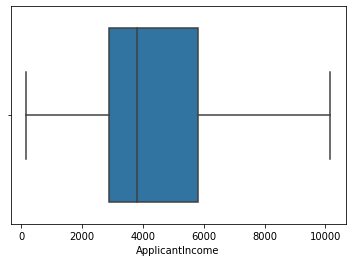

In [19]:
remove_outliers("ApplicantIncome")

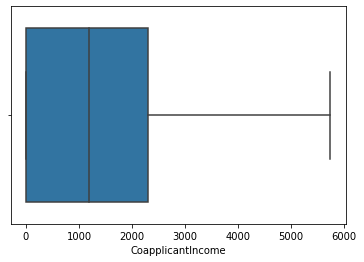

In [20]:
remove_outliers("CoapplicantIncome")

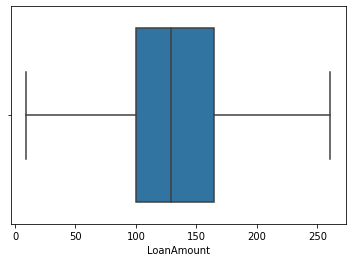

In [21]:
remove_outliers("LoanAmount")

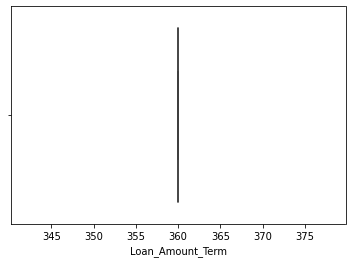

In [22]:
remove_outliers("Loan_Amount_Term")

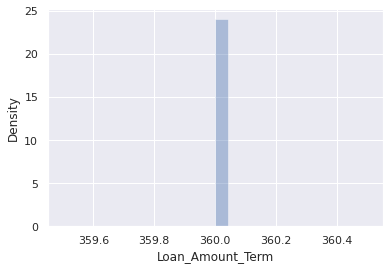

In [41]:
sns.distplot(new_df_cap["Loan_Amount_Term"])

- We decide to drop this column

In [42]:
new_df_cap=new_df_cap.drop(["Loan_Amount_Term"],axis=1)

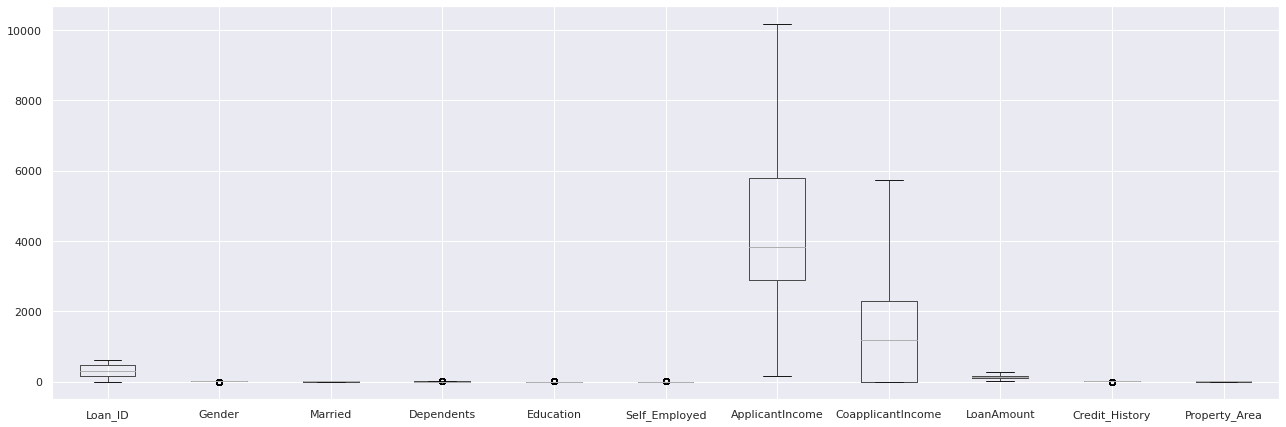

In [43]:
new_df_cap.iloc[:,:13].boxplot(figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

#Checking Skewness

In [44]:
x=new_df_cap.copy()

In [45]:
x.skew().sort_values()

Credit_History      -2.021971
Gender              -1.648795
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
LoanAmount           0.641952
CoapplicantIncome    1.011448
Dependents           1.015551
ApplicantIncome      1.038209
Education            1.367622
Self_Employed        2.159796
dtype: float64

Keeping +/- 0.5 as the range of the skewness, the following features are skewed
- Credit_History      
- Gender              
- Married            
- Dependents           
- Education            
- Self_Employed        
- LoanAmount           
- ApplicantIncome      
- CoapplicantIncome          

From above list only ApplicantIncome, CoapplicantIncome, LoanAmount are non categorical features that are skewed.

Text(0, 0.5, '')

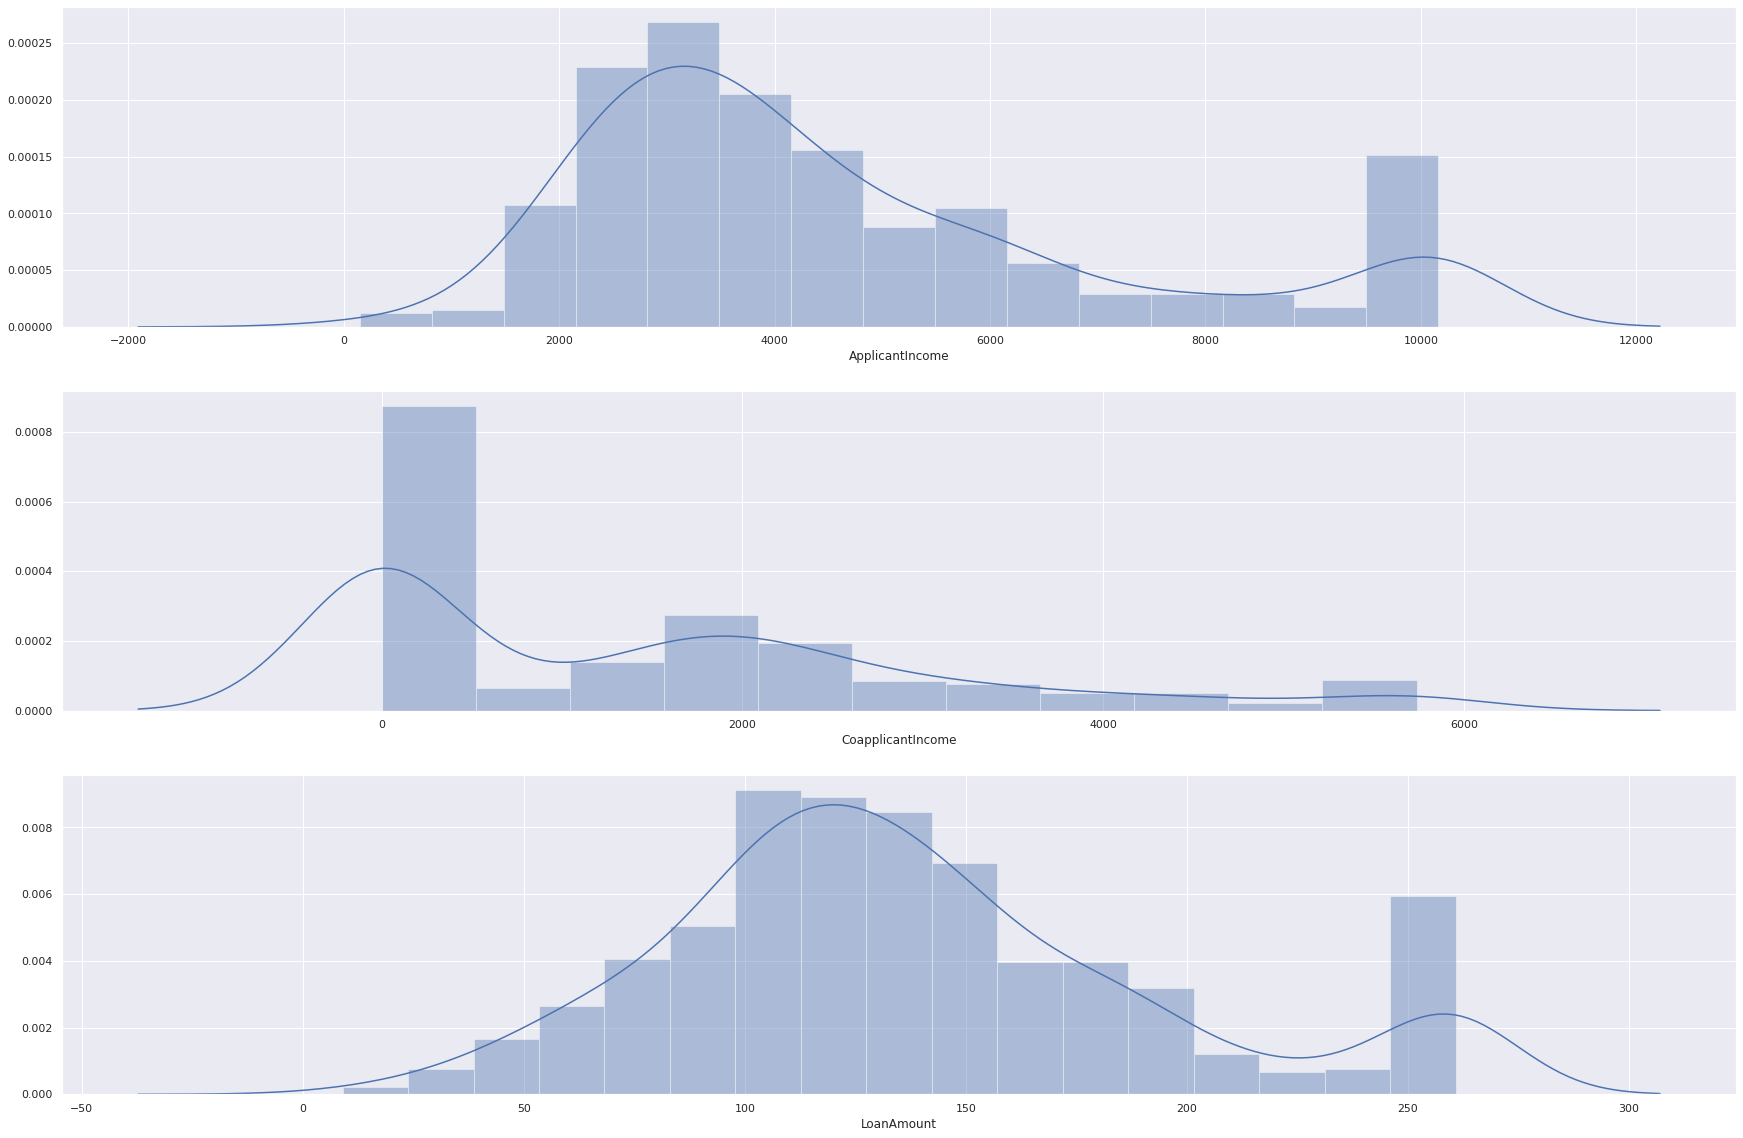

In [30]:
sns.set()
fig,axes= plt.subplots(3,figsize=(30,20))
sns.distplot(x["ApplicantIncome"],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(x["CoapplicantIncome"],ax=axes[1])
axes[1].set_ylabel("")
sns.distplot(x["LoanAmount"],ax=axes[2])
axes[2].set_ylabel("")

- All graphs are of continuous datatype.

In [31]:
from sklearn.preprocessing import power_transform
list4=["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for i in list4:
  x[i]=power_transform(x[i].values.reshape(-1,1))

Text(0, 0.5, '')

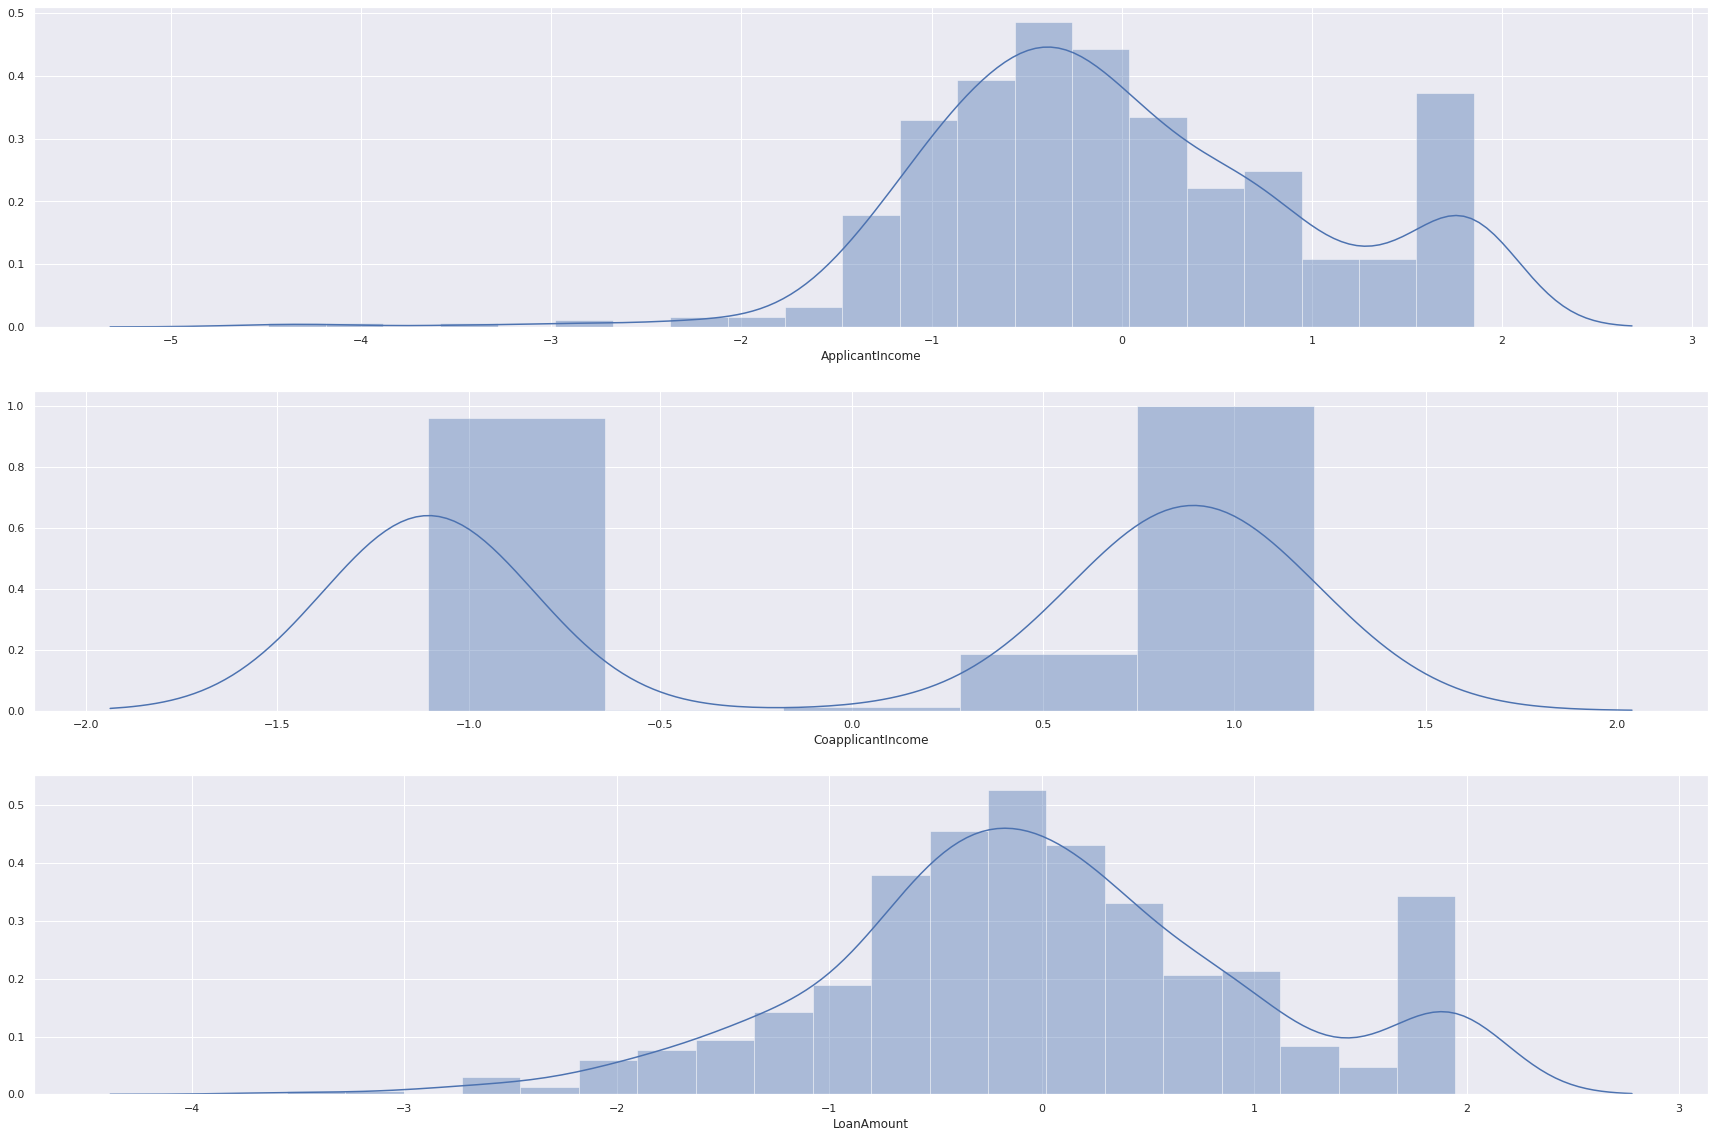

In [32]:
sns.set()
fig,axes= plt.subplots(3,figsize=(30,20))
sns.distplot(x["ApplicantIncome"],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(x["CoapplicantIncome"],ax=axes[1])
axes[1].set_ylabel("")
sns.distplot(x["LoanAmount"],ax=axes[2])
axes[2].set_ylabel("")

- Graphs are slight skewed. 
- We apply different method to check if the distribution can be improved any further.

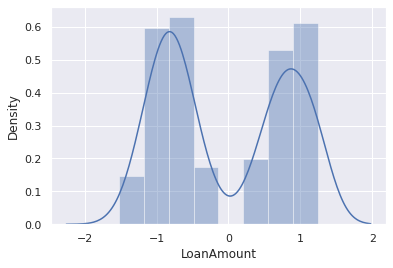

In [40]:
n=np.cbrt(x["LoanAmount"])
sns.distplot(n)

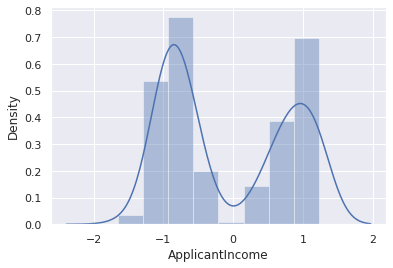

In [38]:
n=np.cbrt(x["ApplicantIncome"])
sns.distplot(n)

- Since the skew value of both the above graphs is within the range of +/-0.5, we decide to keep the columns.

In [46]:
x.skew().sort_values()

Credit_History      -2.021971
Gender              -1.648795
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
LoanAmount           0.641952
CoapplicantIncome    1.011448
Dependents           1.015551
ApplicantIncome      1.038209
Education            1.367622
Self_Employed        2.159796
dtype: float64

# Detecting Multicollinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [48]:
calc_vif(x)

,variables,VIF
0,Loan_ID,3.438609
1,Gender,5.971041
2,Married,3.791674
3,Dependents,1.826162
4,Education,1.304217
5,Self_Employed,1.231265
6,ApplicantIncome,8.767642
7,CoapplicantIncome,2.601269
8,LoanAmount,13.130694
9,Credit_History,5.188806


- VIF>5, indicates the presence of multicollinearity in the datastet. 
- Looking at the correlation heatmap we can observe that contribution of LoanAmount to target column is higher than ApplicantIncome, hence we drop ApplicantIncome

In [50]:
X = x.drop(["ApplicantIncome"],axis=1)
calc_vif(X)

,variables,VIF
0,Loan_ID,3.428768
1,Gender,5.853042
2,Married,3.790835
3,Dependents,1.825767
4,Education,1.284312
5,Self_Employed,1.176720
6,CoapplicantIncome,2.047434
7,LoanAmount,6.697726
8,Credit_History,5.096224
9,Property_Area,2.423818


# Oversampling

In [51]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new, y_new = sm.fit_resample(X, y)

In [53]:
y_new.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [54]:
y=y_new

# Traning and Testing

# Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)

            0    1    2         3    4    5         6         7         8    9
0    0.000000  1.0  0.0  0.000000  0.0  0.0  0.000000  0.545828  1.000000  1.0
1    0.001631  1.0  1.0  0.333333  0.0  0.0  0.262901  0.472691  1.000000  0.0
2    0.003263  1.0  1.0  0.000000  0.0  1.0  0.000000  0.226415  1.000000  1.0
3    0.004894  1.0  1.0  0.000000  1.0  0.0  0.411088  0.440914  1.000000  1.0
4    0.006525  1.0  0.0  0.000000  0.0  0.0  0.000000  0.524330  1.000000  1.0
..        ...  ...  ...       ...  ...  ...       ...       ...       ...  ...
839  0.097879  1.0  1.0  0.000000  0.0  0.0  0.342942  0.514444  0.326250  0.0
840  0.946166  0.0  0.0  0.000000  0.0  0.0  0.000000  0.219988  0.919476  0.0
841  0.667210  1.0  1.0  0.666667  0.0  0.0  0.000000  0.990980  0.000000  0.0
842  0.420881  1.0  0.0  0.000000  0.0  0.0  0.000000  0.984139  1.000000  0.5
843  0.060359  0.0  0.0  0.000000  0.0  0.0  0.000000  0.391369  1.000000  0.0

[844 rows x 10 columns]


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()

In [57]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if  round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i)
        print("training accuracy: ",round(accuracy_score(y_train,pred_train)))
        print("testing accuracy:", round(accuracy_score(y_test,pred_test)))
        print("\n")
       

At random state 8
training accuracy:  1
testing accuracy: 1


At random state 66
training accuracy:  1
testing accuracy: 1




In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [59]:
lg.fit(x_train,y_train) 
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)

In [60]:
print("Train Accuracy:",accuracy_score(y_train,pred_train))

Train Accuracy: 0.7896296296296297


In [61]:
print("Test Accuracy:",accuracy_score(y_test,pred_test))

Test Accuracy: 0.7337278106508875


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        90
           1       0.67      0.86      0.75        79

    accuracy                           0.73       169
   macro avg       0.75      0.74      0.73       169
weighted avg       0.76      0.73      0.73       169



# Cross validation

In [63]:
pred_lg=lg.predict(x_test)
lss=accuracy_score(y_test,pred_lg)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lg,x,y,cv=j)
    print(cv_score)
    cv_mean=cv_score.mean()
    print("At cv:",j)
    print("cv score is ",cv_mean*100)
    print("accuracy is", lss*100)
    print("\n")

[0.58293839 0.42654028]
At cv: 2
cv score is  50.4739336492891
accuracy is 73.37278106508876


[0.66666667 0.74377224 0.55516014]
At cv: 3
cv score is  65.51996836694346
accuracy is 73.37278106508876


[0.6492891  0.67298578 0.82464455 0.66824645]
At cv: 4
cv score is  70.37914691943128
accuracy is 73.37278106508876


[0.68047337 0.66863905 0.76331361 0.81065089 0.75      ]
At cv: 5
cv score is  73.46153846153845
accuracy is 73.37278106508876


[0.69503546 0.66666667 0.65248227 0.83687943 0.8        0.79285714]
At cv: 6
cv score is  74.06534954407294
accuracy is 73.37278106508876


[0.69421488 0.69421488 0.66942149 0.76859504 0.81666667 0.79166667
 0.83333333]
At cv: 7
cv score is  75.25875639512003
accuracy is 73.37278106508876


[0.68867925 0.6509434  0.66981132 0.66981132 0.8        0.83809524
 0.78095238 0.84761905]
At cv: 8
cv score is  74.32389937106917
accuracy is 73.37278106508876


[0.70212766 0.63829787 0.73404255 0.63829787 0.77659574 0.84042553
 0.80851064 0.80645161 0.8709

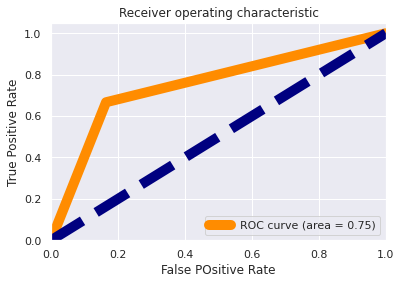

In [64]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

# Model Selection

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    rfscore=cross_val_score(algorithm_instance,x,y,cv=14)
    rfc=rfscore.mean()
    print('Cross Val Score:',round(rfc*100,2))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   

    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()

#KNeighborsClassifier

Accuracy of training model : 84.44
Accuracy of test data : 75.15
Cross Val Score: 76.45

Classification report for test data
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        90
           1       0.72      0.77      0.74        79

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       332
           1       0.81      0.90      0.85       343

    accuracy                           0.84       675
   macro avg       0.85      0.84      0.84       675
weighted avg       0.85      0.84      0.84       675

Confusion Matrix
 [[66 24]
 [18 61]]




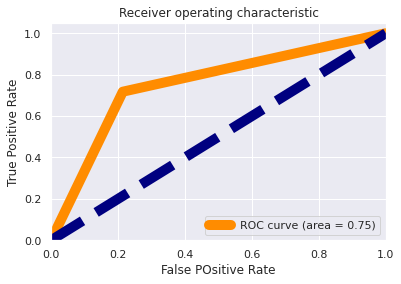

In [75]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVC

Accuracy of training model : 79.85
Accuracy of test data : 72.19
Cross Val Score: 76.57

Classification report for test data
               precision    recall  f1-score   support

           0       0.84      0.59      0.69        90
           1       0.65      0.87      0.75        79

    accuracy                           0.72       169
   macro avg       0.75      0.73      0.72       169
weighted avg       0.75      0.72      0.72       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       332
           1       0.75      0.92      0.82       343

    accuracy                           0.80       675
   macro avg       0.82      0.80      0.79       675
weighted avg       0.81      0.80      0.80       675

Confusion Matrix
 [[53 37]
 [10 69]]




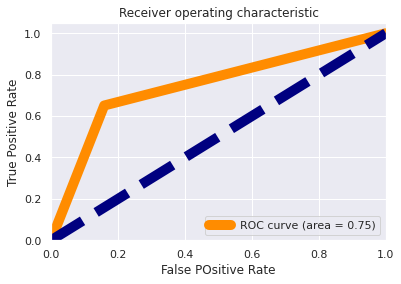

In [74]:
from sklearn import svm
s=svm.SVC(probability=True)
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 78.7
Cross Val Score: 66.37

Classification report for test data
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        90
           1       0.79      0.75      0.77        79

    accuracy                           0.79       169
   macro avg       0.79      0.78      0.79       169
weighted avg       0.79      0.79      0.79       169

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       343

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

Confusion Matrix
 [[74 16]
 [20 59]]




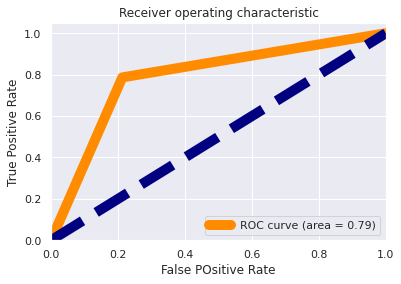

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Ensemble Methods

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'oob_score':['True','False'],
           'n_estimators':range(0,100,25)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': None, 'n_estimators': 75, 'oob_score': 'False'}


Accuracy of training model : 100.0
Accuracy of test data : 82.84
Cross Val Score: 71.01

Classification report for test data
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        90
           1       0.81      0.82      0.82        79

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       343

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

Confusion Matrix
 [[75 15]
 [14 65]]




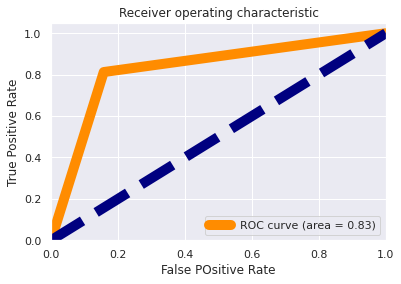

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=75, class_weight= 'balanced',criterion='gini', max_features=None, oob_score= 'False')
model_selection(rf,x_train,y_train,x_test,y_test)

# AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameter={'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate' : [0.0,1.0,2.0],
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf2=AdaBoostClassifier()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 0}


Accuracy of training model : 81.19
Accuracy of test data : 74.56
Cross Val Score: 63.93

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.61      0.72        90
           1       0.67      0.90      0.77        79

    accuracy                           0.75       169
   macro avg       0.77      0.75      0.74       169
weighted avg       0.78      0.75      0.74       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.89      0.71      0.79       332
           1       0.76      0.91      0.83       343

    accuracy                           0.81       675
   macro avg       0.83      0.81      0.81       675
weighted avg       0.82      0.81      0.81       675

Confusion Matrix
 [[55 35]
 [ 8 71]]




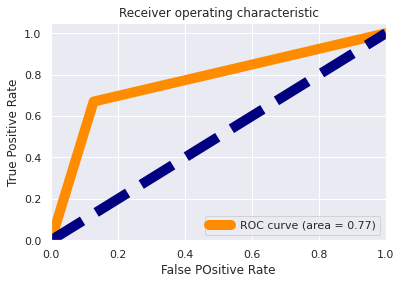

In [70]:
from sklearn.ensemble import AdaBoostClassifier
rf2=AdaBoostClassifier(algorithm='SAMME', learning_rate= 1.0, n_estimators= 50,random_state= 0)
model_selection(rf2,x_train,y_train,x_test,y_test)


# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
          'learning_rate' : [0.0,1.0,2.0],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,25)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'exponential', 'max_features': 'sqrt', 'n_estimators': 50}


Accuracy of training model : 98.52
Accuracy of test data : 81.07
Cross Val Score: 60.93

Classification report for test data
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        90
           1       0.78      0.84      0.80        79

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       332
           1       0.98      0.99      0.99       343

    accuracy                           0.99       675
   macro avg       0.99      0.99      0.99       675
weighted avg       0.99      0.99      0.99       675

Confusion Matrix
 [[71 19]
 [13 66]]




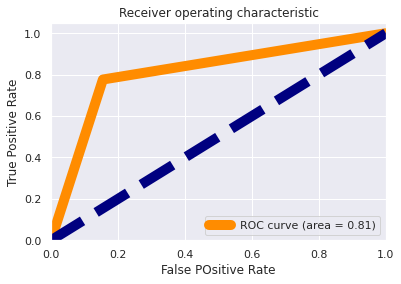

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
rf3=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0, loss='exponential', max_features= 'sqrt', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameter={
           'oob_score': [True,False],
           'n_jobs':range(0,100,25),
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf4=BaggingClassifier()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 75, 'n_jobs': 25, 'oob_score': True, 'random_state': 50}


Accuracy of training model : 100.0
Accuracy of test data : 82.84
Cross Val Score: 71.01

Classification report for test data
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        90
           1       0.81      0.82      0.82        79

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       343

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

Confusion Matrix
 [[75 15]
 [14 65]]




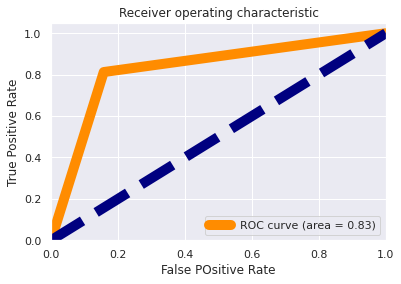

In [69]:
from sklearn.ensemble import BaggingClassifier
rf4=BaggingClassifier(n_jobs=25, oob_score= True, random_state=50, n_estimators= 75)
model_selection(rf4,x_train,y_train,x_test,y_test)


# StackingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
parameter={
            'stack_method':['auto', 'predict_proba', 'decision_function', 'predict'],
           'n_jobs':range(0,100,50)
         }

rf5=StackingClassifier(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 50, 'stack_method': 'auto'}


Accuracy of training model : 82.07
Accuracy of test data : 73.37
Cross Val Score: 77.05

Classification report for test data
               precision    recall  f1-score   support

           0       0.84      0.62      0.71        90
           1       0.67      0.86      0.75        79

    accuracy                           0.73       169
   macro avg       0.75      0.74      0.73       169
weighted avg       0.76      0.73      0.73       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       332
           1       0.77      0.92      0.84       343

    accuracy                           0.82       675
   macro avg       0.83      0.82      0.82       675
weighted avg       0.83      0.82      0.82       675

Confusion Matrix
 [[56 34]
 [11 68]]




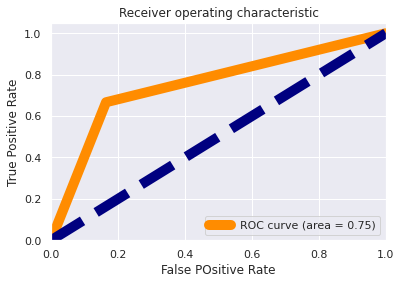

In [68]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
rf5=StackingClassifier(estimators,n_jobs=50, stack_method= 'auto')
model_selection(rf5,x_train,y_train,x_test,y_test)

# Model Saving

In [76]:
import pickle
filename='rfz.pk1'
pickle.dump(rf4,open(filename,'wb'))

We selected Bagging Classifier model since
- it has best cross validation score among all the model and high accuracy.
- highest auc score of 0.86

# Loading Model

In [77]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

82.84023668639054


# Testing Loaded Model

In [78]:
def test_inp():
  inp = []
  i=0
  print("Enter single input\n")
  while i<10:
    inn=float(input(f"Enter input {i+1}: "))
    inp.append(inn)
    i=i+1
  input_data_as_numpy_array = np.asarray(inp)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  if prediction[0]==0:
      print("\nLoan Status: No")
  if prediction[0]==1:
      print("\nLoan Status: Yes")

In [79]:
print("Input\n",x.head(),"\n\nOutput\n",y.head())

Input
           0    1    2         3    4    5         6         7    8    9
0  0.000000  1.0  0.0  0.000000  0.0  0.0  0.000000  0.545828  1.0  1.0
1  0.001631  1.0  1.0  0.333333  0.0  0.0  0.262901  0.472691  1.0  0.0
2  0.003263  1.0  1.0  0.000000  0.0  1.0  0.000000  0.226415  1.0  1.0
3  0.004894  1.0  1.0  0.000000  1.0  0.0  0.411088  0.440914  1.0  1.0
4  0.006525  1.0  0.0  0.000000  0.0  0.0  0.000000  0.524330  1.0  1.0 

Output
 0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64


In above table we have seen that 
- Input 0th row gives output 1 i.e Yes loan approved 
-Input 1st row gives output 0 i.e No loan rejected
-Input 2nd row gives output 1 i.e Yes loan approved
-Input 3rd row gives output 1 i.e Yes loan approved
-Input 4th row gives output 1 i.e Yes loan approved 

So we can use this input data with loaded model to test if model gives correct output

In [80]:
test_inp()

Enter single input

Enter input 1: 0
Enter input 2: 1
Enter input 3: 0
Enter input 4: 0
Enter input 5: 0
Enter input 6: 0
Enter input 7: 0
Enter input 8:  0.545828
Enter input 9: 1
Enter input 10: 1

Loan Status: Yes


In [82]:
test_inp()

Enter single input

Enter input 1:  0.001631 
Enter input 2:  1.0  
Enter input 3: 1.0  
Enter input 4: 0.333333  
Enter input 5: 0.0  
Enter input 6: 0.0  
Enter input 7: 0.262901  
Enter input 8: 0.472691  
Enter input 9: 1
Enter input 10: 0

Loan Status: No
